In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns




/kaggle/input/dont-overfit-ii/sample_submission.csv
/kaggle/input/dont-overfit-ii/test.csv
/kaggle/input/dont-overfit-ii/train.csv


In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [5]:
data.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.268000,-0.098064,0.001208,0.090680,-0.122248,0.011500,-0.116624,0.006932,0.100988,...,0.013052,0.007500,0.000452,0.060276,-0.090308,-0.040728,-0.002132,-0.012540,-0.039904,0.073236
std,72.312977,0.443806,0.996063,0.955117,0.968065,0.933001,0.945662,1.081705,1.014091,1.028042,...,1.027845,1.048169,1.026398,1.048744,1.008657,1.051273,1.065524,0.958744,0.948251,0.924989
min,0.000000,0.000000,-3.181000,-3.041000,-2.967000,-2.898000,-2.837000,-3.831000,-2.873000,-2.489000,...,-2.824000,-2.971000,-3.592000,-3.071000,-2.621000,-3.013000,-3.275000,-2.665000,-3.006000,-2.471000
25%,62.250000,0.000000,-0.756250,-0.624750,-0.515750,-0.695500,-0.678000,-0.758500,-0.646250,-0.589000,...,-0.764000,-0.729250,-0.699750,-0.589000,-0.701000,-0.696750,-0.555750,-0.677500,-0.719750,-0.559000
50%,124.500000,0.000000,-0.064500,-0.008000,0.067500,-0.090000,0.028000,-0.073500,-0.076500,0.104500,...,0.017500,0.053000,0.029500,0.042500,-0.102000,-0.057000,0.094500,-0.025500,-0.027500,0.160500
75%,186.750000,1.000000,0.647750,0.493250,0.716000,0.436250,0.625250,0.554250,0.676500,0.717000,...,0.690500,0.665000,0.670750,0.713250,0.532250,0.727000,0.590000,0.671000,0.717000,0.711000
max,249.000000,1.000000,2.347000,3.138000,2.609000,2.590000,2.413000,2.687000,2.793000,3.766000,...,2.773000,2.701000,3.193000,4.280000,2.716000,3.074000,2.626000,2.388000,2.730000,3.401000




# to find the correlation among variables (Multicollinearity)




In [6]:
data.count()

id        250
target    250
0         250
1         250
2         250
         ... 
295       250
296       250
297       250
298       250
299       250
Length: 302, dtype: int64

In [7]:
data.corr()
cor = data.iloc[:,0:5].corr()
print(cor)


              id    target         0         1         2
id      1.000000  0.002565 -0.072283  0.067695  0.010374
target  0.002565  1.000000 -0.085268 -0.111172 -0.036050
0      -0.072283 -0.085268  1.000000  0.039939  0.069846
1       0.067695 -0.111172  0.039939  1.000000  0.023237
2       0.010374 -0.036050  0.069846  0.023237  1.000000


# >  LINEAR REGRESSION

In [8]:
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)


(175, 302)
(75, 302)


# split the train and test into X and Y variables
# ------------------------------------------------


In [9]:
train_x = train.iloc[:,0:120]; train_y = train.iloc[:,120]
test_x  = test.iloc[:,0:120];  test_y = test.iloc[:,120]

In [10]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(175, 120)
(175,)
(75, 120)
(75,)


In [11]:
train_x.head()
train_y.head()


22     0.686
48    -1.229
101   -0.053
19    -0.543
236    0.654
Name: 118, dtype: float64

In [12]:
train_y.head(20)

22     0.686
48    -1.229
101   -0.053
19    -0.543
236    0.654
60     0.070
196    0.144
172   -0.075
52    -0.081
140    1.810
201   -0.454
125   -0.297
49     0.438
16    -1.466
190    0.787
53     0.210
75    -0.038
83     1.231
223   -0.450
82    -0.982
Name: 118, dtype: float64

In [13]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
22,22,0.0,-0.437,-0.740,-0.390,0.687,1.031,0.108,-0.435,1.448,...,1.945,-0.303,0.409,1.306,-1.714,-1.174,0.160,0.117,-1.067,-0.290
48,48,0.0,0.899,-0.773,1.472,-0.334,-0.141,-1.576,-1.540,-0.623,...,0.373,0.343,-0.509,1.183,0.462,1.254,-0.095,-0.371,0.783,0.768
101,101,0.0,1.148,-0.927,0.812,-0.748,0.109,0.785,-1.009,-1.176,...,1.089,-0.348,0.392,0.119,-1.108,0.705,-0.857,1.807,1.381,0.340
19,19,1.0,-1.056,0.586,0.995,-0.873,-0.021,2.497,-0.526,0.696,...,-1.564,0.333,1.774,-1.706,0.234,1.239,-0.467,0.204,0.896,-1.250
236,236,0.0,-0.943,0.776,0.151,-0.708,1.850,-0.663,-0.824,-0.370,...,0.515,0.312,-0.351,-0.473,0.447,0.443,-1.104,-0.987,0.642,-0.181


In [14]:
train.dtypes

id          int64
target    float64
0         float64
1         float64
2         float64
           ...   
295       float64
296       float64
297       float64
298       float64
299       float64
Length: 302, dtype: object

# ##To Check the Accuracy:
#-----------------------------

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pdct1))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pdct1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pdct1))) 

Mean Absolute Error: 1.6819203723464031
Mean Squared Error: 3.981179734134414
Root Mean Squared Error: 1.995289386062687


RMSE: 0.9579943877557057
MSE: 0.9177532469714293
MAE: 0.8014554834253336


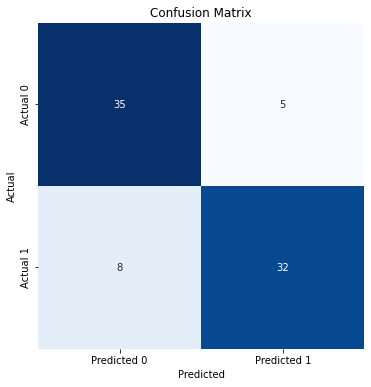

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


y_train_binary = (y_train > np.median(y_train)).astype(int)
y_pred_binary = (y_pred > np.median(y_train)).astype(int)
conf_matrix = confusion_matrix(y_train_binary, lin_reg.predict(X_train) > np.median(y_train))


print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)

# confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
